In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [ ]:
df1 = pd.read_csv("delhi_cleaned_bangalore_format.csv")
display(df1.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Flat,Under Construction,Noida Extension,3 BHK,NaN,1350.0,3.0,1.0,5600000.0
1,Flat,Ready to Move,Sector 79,3 BHK,NaN,1490.0,3.0,1.0,8800000.0
2,Flat,Ready to Move,Vaishali,4 BHK,NaN,2385.0,5.0,1.0,16500000.0
3,Flat,Ready To Move,Link Road,2 BHK,NaN,1050.0,2.0,3.0,3810000.0
4,Flat,Ready to Move,Jaypee Pavilion Court Sector 128,2 BHK,NaN,1350.0,2.0,3.0,6200000.0


In [ ]:
df1.shape

(7738, 9)

In [ ]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(7738, 5)

In [ ]:
df2.head()

,location,size,total_sqft,bath,price
0,Noida Extension,3 BHK,1350.0,3.0,5600000.0
1,Sector 79,3 BHK,1490.0,3.0,8800000.0
2,Vaishali,4 BHK,2385.0,5.0,16500000.0
3,Link Road,2 BHK,1050.0,2.0,3810000.0
4,Jaypee Pavilion Court Sector 128,2 BHK,1350.0,2.0,6200000.0


In [ ]:
df2.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df3 = df2.dropna()
df3.isnull().sum()


,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df3.shape

(7738, 5)

In [ ]:
df3.head(

)

,location,size,total_sqft,bath,price
0,Noida Extension,3 BHK,1350.0,3.0,5600000.0
1,Sector 79,3 BHK,1490.0,3.0,8800000.0
2,Vaishali,4 BHK,2385.0,5.0,16500000.0
3,Link Road,2 BHK,1050.0,2.0,3810000.0
4,Jaypee Pavilion Court Sector 128,2 BHK,1350.0,2.0,6200000.0


In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

array([ 3,  4,  2,  5,  6, 10,  7,  8,  9])

In [ ]:
df3.total_sqft.unique()

array([1350., 1490., 2385., ..., 2374., 1692., 1898.])

In [ ]:
df3.head(

)

,location,size,total_sqft,bath,price,bhk
0,Noida Extension,3 BHK,1350.0,3.0,5600000.0,3
1,Sector 79,3 BHK,1490.0,3.0,8800000.0,3
2,Vaishali,4 BHK,2385.0,5.0,16500000.0,4
3,Link Road,2 BHK,1050.0,2.0,3810000.0,2
4,Jaypee Pavilion Court Sector 128,2 BHK,1350.0,2.0,6200000.0,2


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk


In [ ]:
df5 = df3.copy()
df5['price_per_sqft'] = df5['price']/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Noida Extension,3 BHK,1350.0,3.0,5600000.0,3,4148.148148
1,Sector 79,3 BHK,1490.0,3.0,8800000.0,3,5906.040268
2,Vaishali,4 BHK,2385.0,5.0,16500000.0,4,6918.238994
3,Link Road,2 BHK,1050.0,2.0,3810000.0,2,3628.571429
4,Jaypee Pavilion Court Sector 128,2 BHK,1350.0,2.0,6200000.0,2,4592.592593


In [ ]:
len(df5.location.unique())

3318

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

,count
location,
Raj Nagar Extension,211
Indirapuram,205
Noida Extension,162
Greater Noida West,143
NH 24,87
...,...
Tower A House No 104,1
Prakash Vir Shastri Rd,1
4256.,1


In [ ]:
location_stats.values.sum()


np.int64(7738)

In [ ]:
len(location_stats[location_stats>10])

113

In [ ]:
len(location_stats)

3318

In [ ]:
len(location_stats[location_stats<=10])

3205

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,
Sector 21C,10
Shipra Suncity,10
Shalimar garden,10
DLF Ankur Vihar,10
Mayur Vihar 1,10
...,...
Tower A House No 104,1
Prakash Vir Shastri Rd,1
4256.,1


In [ ]:
len(df5.location.unique())

3318

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

114

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Noida Extension,3 BHK,1350.0,3.0,5600000.0,3,4148.148148
1,Sector 79,3 BHK,1490.0,3.0,8800000.0,3,5906.040268
2,Vaishali,4 BHK,2385.0,5.0,16500000.0,4,6918.238994
3,other,2 BHK,1050.0,2.0,3810000.0,2,3628.571429
4,other,2 BHK,1350.0,2.0,6200000.0,2,4592.592593
5,other,2 BHK,1150.0,2.0,3700000.0,2,3217.391304
6,other,2 BHK,890.0,2.0,3270000.0,2,3674.157303
7,other,2 BHK,850.0,2.0,3990000.0,2,4694.117647
8,Sector 2,2 BHK,960.0,2.0,3500000.0,2,3645.833333
9,other,3 BHK,1400.0,3.0,5500000.0,3,3928.571429


In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10,other,3 BHK,850.0,2.0,7300000.0,3,8588.235294
42,other,2 BHK,540.0,2.0,2400000.0,2,4444.444444
47,Ghaziabad,6 BHK,1232.0,3.0,4800000.0,6,3896.103896
114,other,2 BHK,559.0,2.0,7000000.0,2,12522.361360
117,other,3 BHK,750.0,2.0,2630000.0,3,3506.666667


In [ ]:
df5['price']=df5['price']/100000

In [ ]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Noida Extension,3 BHK,1350.0,3.0,56.0,3,4148.148148
1,Sector 79,3 BHK,1490.0,3.0,88.0,3,5906.040268
2,Vaishali,4 BHK,2385.0,5.0,165.0,4,6918.238994
3,other,2 BHK,1050.0,2.0,38.1,2,3628.571429
4,other,2 BHK,1350.0,2.0,62.0,2,4592.592593


In [ ]:
df5.shape

(7738, 7)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(7451, 7)

In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,7451.000000
mean,5498.470996
std,2259.931840
min,2100.000000
25%,3923.260950
50%,4948.453608
75%,6321.784150
max,25925.925926


In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(5467, 7)

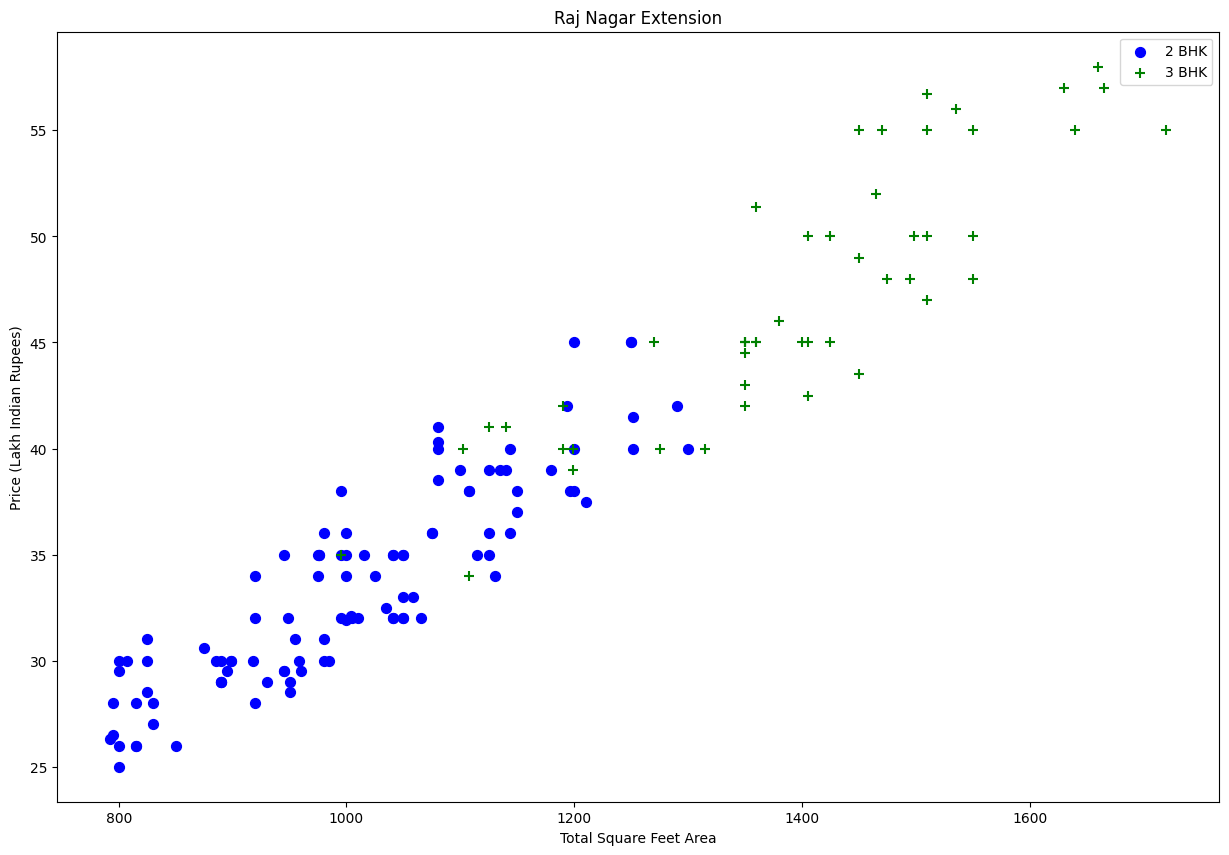

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Raj Nagar Extension")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(4405, 7)

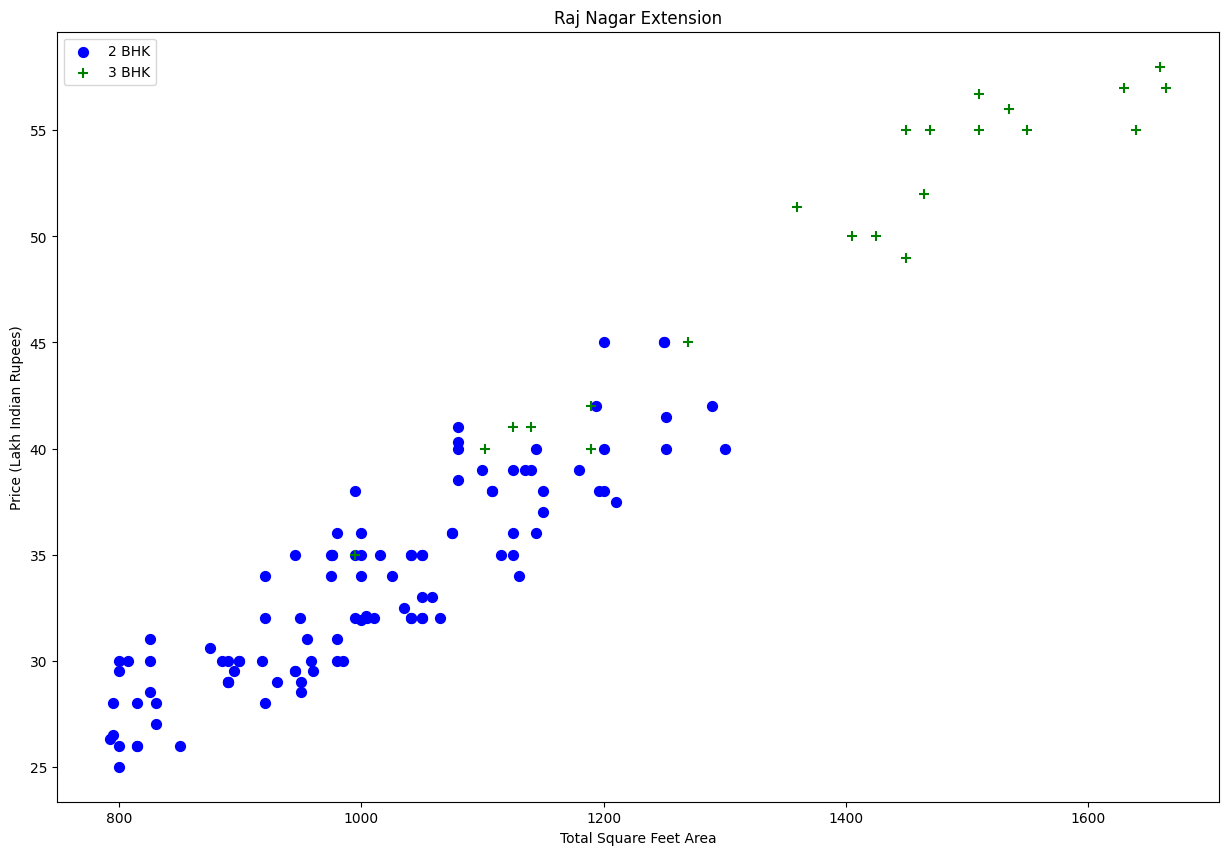

In [ ]:
plot_scatter_chart(df8,"Raj Nagar Extension")

Text(0, 0.5, 'Count')

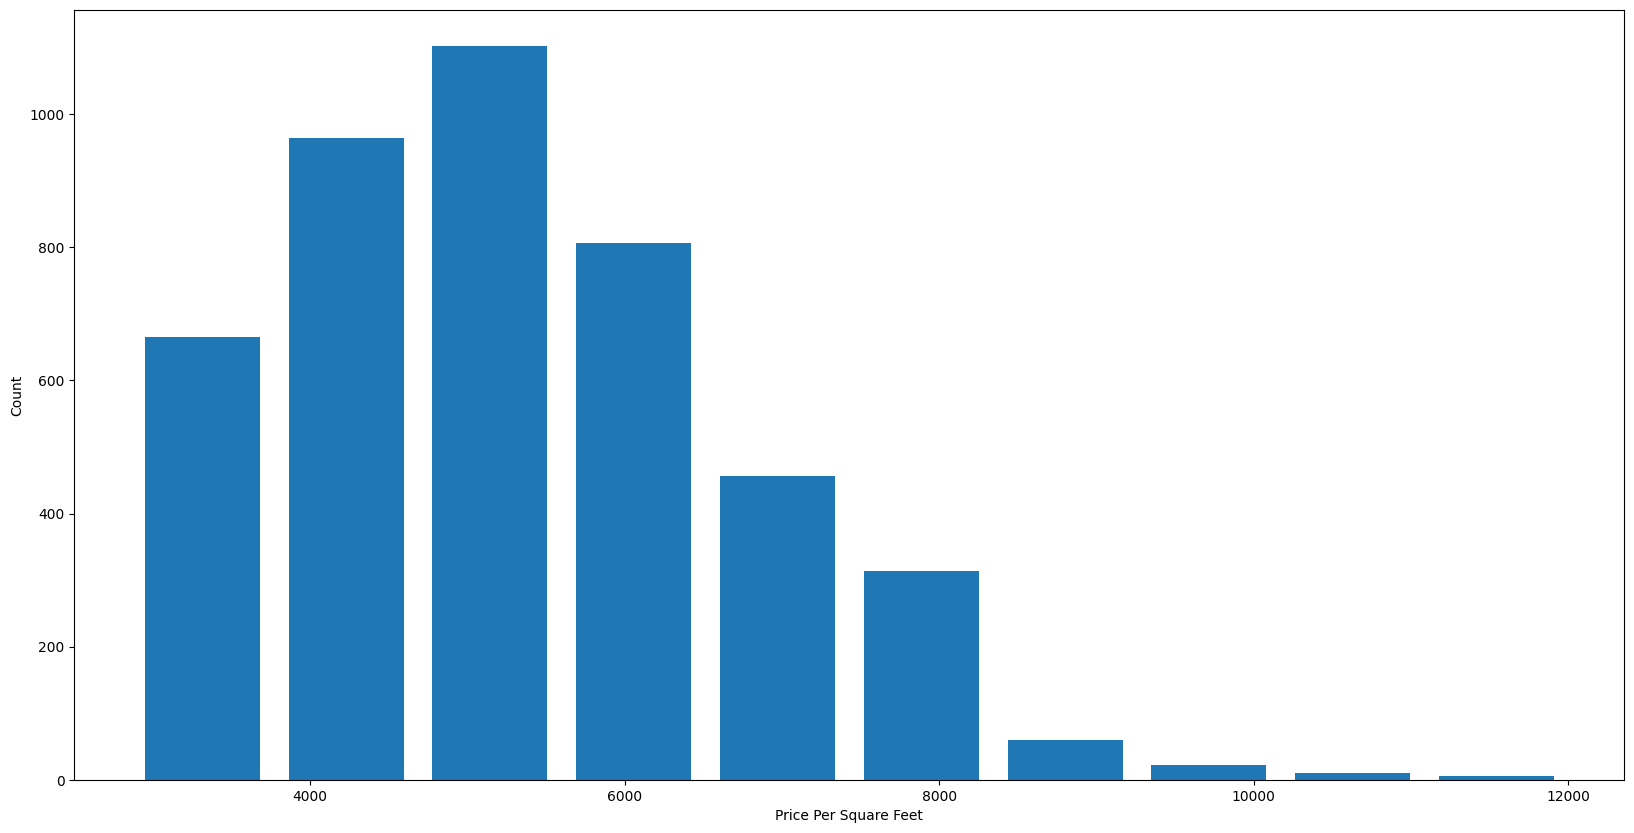

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

array([ 2.,  3.,  4.,  7.,  5.,  6.,  9.,  8., 10.])

Text(0, 0.5, 'Count')

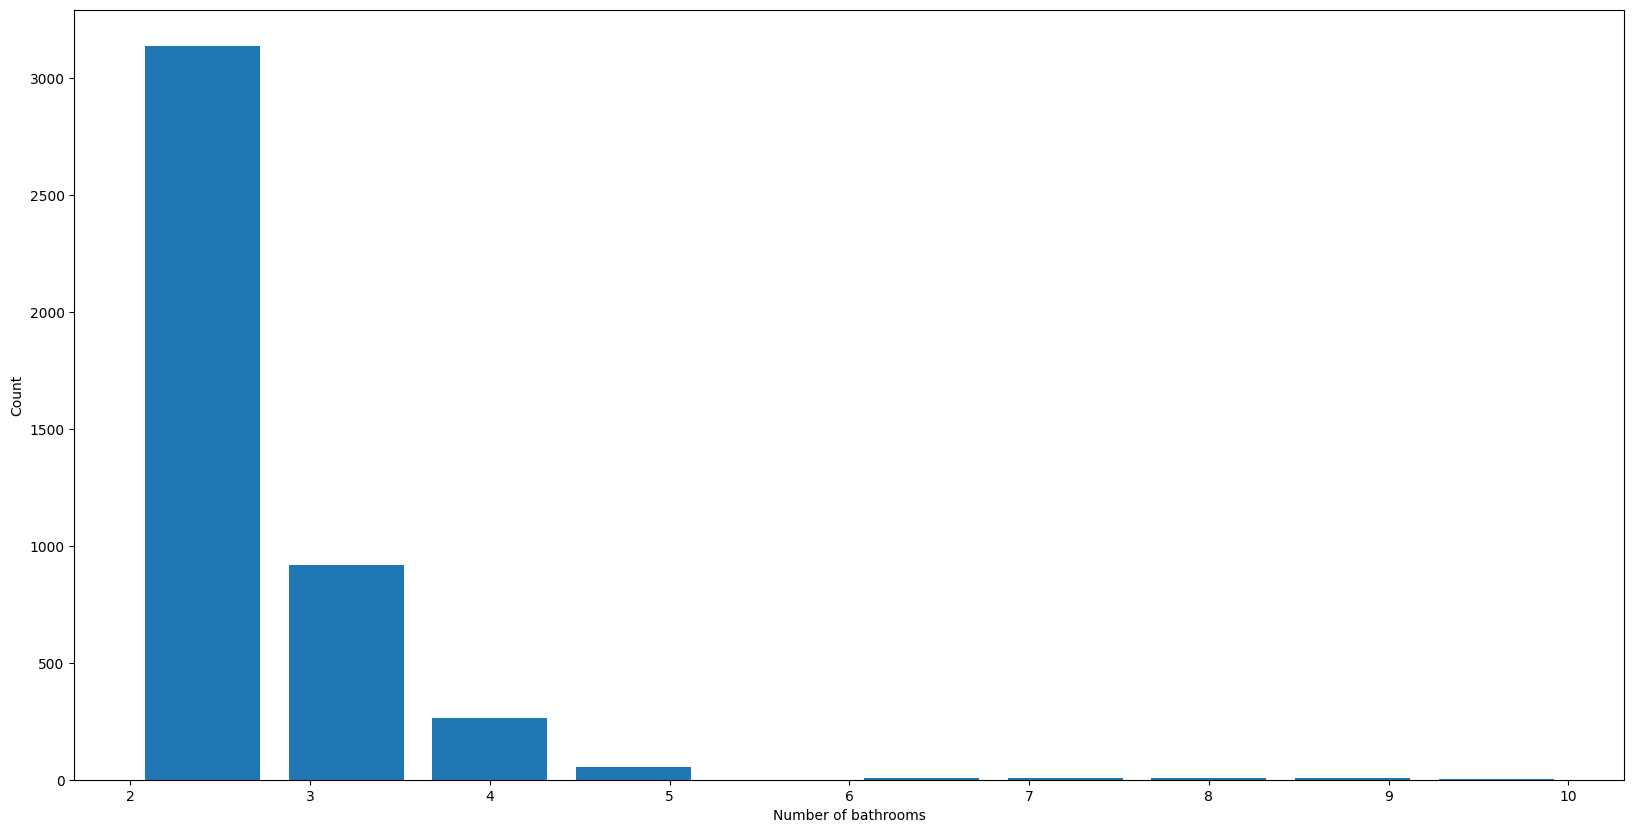

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>6]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
278,Gurgaon,7 BHK,4200.0,7.0,335.0,7,7976.190476
1402,Sector 50,9 BHK,5400.0,9.0,460.0,9,8518.518519
1500,Sector 67,5 BHK,6000.0,8.0,400.0,5,6666.666667
2098,Sushant Lok 1,8 BHK,5000.0,8.0,600.0,8,12000.000000
2323,other,10 BHK,9000.0,10.0,450.0,10,5000.000000
2502,other,6 BHK,5500.0,7.0,425.0,6,7727.272727
3079,other,10 BHK,3744.0,8.0,250.0,10,6677.350427
3172,other,8 BHK,5000.0,7.0,375.0,8,7500.000000
3249,other,7 BHK,3400.0,8.0,250.0,7,7352.941176
3280,other,5 BHK,4000.0,7.0,300.0,5,7500.000000


In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1351,Sector 46,3 BHK,2400.0,6.0,180.0,3,7500.000000
1500,Sector 67,5 BHK,6000.0,8.0,400.0,5,6666.666667
3548,other,5 BHK,5200.0,9.0,350.0,5,6730.769231
3617,other,4 BHK,2370.0,7.0,140.0,4,5907.172996


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(4392, 7)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,Ahinsa Khand 2,1595.0,2.0,70.0,3
1,Ahinsa Khand 2,1665.0,2.0,70.0,3
2,Ahinsa Khand 2,810.0,2.0,34.0,2


In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Ahinsa Khand 2,Bhopura,C-16,Chi 5,Crossings Republik,Dwarka,Dwarka Mor,Eta 2,Ghaziabad,Govindpuram,...,Tech Zone,Techzone 4,Uttam Nagar,Uttam Nagar West,Vaishali,Vasundhara,Vikaspuri,Yamuna Expressway,Zeta 1,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Ahinsa Khand 2,Bhopura,C-16,Chi 5,Crossings Republik,...,Sushant Lok 2,Tech Zone,Techzone 4,Uttam Nagar,Uttam Nagar West,Vaishali,Vasundhara,Vikaspuri,Yamuna Expressway,Zeta 1
0,Ahinsa Khand 2,1595.0,2.0,70.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Ahinsa Khand 2,1665.0,2.0,70.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Ahinsa Khand 2,810.0,2.0,34.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Ahinsa Khand 2,1073.0,2.0,47.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Ahinsa Khand 2,1550.0,2.0,70.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Ahinsa Khand 2,Bhopura,C-16,Chi 5,Crossings Republik,Dwarka,...,Sushant Lok 2,Tech Zone,Techzone 4,Uttam Nagar,Uttam Nagar West,Vaishali,Vasundhara,Vikaspuri,Yamuna Expressway,Zeta 1
0,1595.0,2.0,70.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1665.0,2.0,70.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12.shape

(4392, 117)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Ahinsa Khand 2,Bhopura,C-16,Chi 5,Crossings Republik,Dwarka,Dwarka Mor,...,Sushant Lok 2,Tech Zone,Techzone 4,Uttam Nagar,Uttam Nagar West,Vaishali,Vasundhara,Vikaspuri,Yamuna Expressway,Zeta 1
0,1595.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1665.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,810.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = df12.price
y.head(3)

,price
0,70.0
1,70.0
2,34.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9280528073009365

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91909629, 0.92469161, 0.93115392, 0.91483582, 0.90918943])

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2, 5],
                'selection': ['random', 'cyclic'],
                'max_iter': [1000, 2000, 5000]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        print(f"Training {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='neg_mean_squared_error', return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': -gs.best_score_,  # Convert back to positive MSE
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function
find_best_model_using_gridsearchcv(X, y)

Training linear_regression...
Training lasso...
Training decision_tree...


,model,best_score,best_params
0,linear_regression,211.961236,"{'copy_X': True, 'fit_intercept': True}"
1,lasso,289.016259,"{'alpha': 0.1, 'max_iter': 1000, 'selection': ..."
2,decision_tree,293.138830,"{'criterion': 'squared_error', 'max_depth': No..."


In [2]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert to DataFrame with proper feature names to avoid warnings
    x_df = pd.DataFrame([x], columns=X.columns)

    return lr_clf.predict(x_df)[0]

# Test examples
print("=== PRICE PREDICTIONS ===")
print(predict_price('Dwarka', 1000, 2, 2))
print(f"Sector 45: {predict_price('Sector 45', 1500, 3, 3):.2f} Lakhs")
print(f"Indirapuram: {predict_price('Indirapuram', 1200, 2, 2):.2f} Lakhs")

=== PRICE PREDICTIONS ===


NameError: name 'np' is not defined

In [1]:
import pickle
with open('delhi_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

NameError: name 'lr_clf' is not defined

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))